##Introduction
This is the modelling stage notebook of the project - ForeWelcome to the modeling stage of our project: Forecasting the Electricity Demand and Supply Gap for Sub-Saharan African (SSA) Countries. This notebook focuses on developing predictive models to identify and forecast gaps between electricity demand and supply across SSA countries.casting the gap between electricity demand and supply for SSA countries

#Data Importation and description

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/HAMOYE_BIGCAN/data.xlsx")
df.head()

,entity,year,income_group,gdp_pc,el_access_total,el_access_urban,el_access_rural,population,pop_no_el_access_total,urban_share,...,el_from_solar,el_from_oil,el_from_wind,el_from_bioenergy,renewables_other,el_inst_capacity_total,income_group_num,supply_rate,t_demand,gap
0,Angola,2000,Lower middle income,556.884216,24.238865,44.931600,3.473994,16394067,12011852,50.087,...,0.0,0.53,0.0,0.0,0.0,500.0,2,0.059409,5.940872,4.500872
1,Angola,2001,Lower middle income,527.464111,20.000000,30.000000,9.477077,16941584,13556602,51.274,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.082000,8.200000,6.560000
2,Angola,2002,Lower middle income,872.657654,26.320255,47.670353,2.759651,17516140,12897117,52.461,...,0.0,0.62,0.0,0.0,0.0,500.0,2,0.066869,6.686865,4.926865
3,Angola,2003,Lower middle income,982.805603,27.355137,49.043540,2.255916,18124346,13144298,53.645,...,0.0,0.75,0.0,0.0,0.0,500.0,2,0.072747,7.274685,5.284685
4,Angola,2004,Lower middle income,1254.696167,28.395485,50.428510,1.653744,18771128,13405173,54.827,...,0.0,0.49,0.0,0.0,0.0,624.0,2,0.078886,7.888578,5.648578


In [5]:
df.shape

(1104, 31)

In [6]:
df.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   entity                    1104 non-null   object 
 1   year                      1104 non-null   int64  
 2   income_group              1104 non-null   object 
 3   gdp_pc                    1104 non-null   float64
 4   el_access_total           1104 non-null   float64
 5   el_access_urban           1104 non-null   float64
 6   el_access_rural           1104 non-null   float64
 7   population                1104 non-null   int64  
 8   pop_no_el_access_total    1104 non-null   int64  
 9   urban_share               1104 non-null   float64
 10  el_generation             1104 non-null   float64
 11  el_demand                 1104 non-null   float64
 12  net_imports               1104 non-null   float64
 13  el_generation_pc          1104 non-null   float64
 14  el_deman

In [ ]:
df.isna().sum()

entity                      0
year                        0
income_group                0
gdp_pc                      0
el_access_total             0
el_access_urban             0
el_access_rural             0
population                  0
pop_no_el_access_total      0
urban_share                 0
el_generation               0
el_demand                   0
net_imports                 0
el_generation_pc            0
el_demand_pc                0
final_energy_consumption    0
fin_support                 0
el_from_coal                0
el_from_gas                 0
el_from_nuclear             0
el_from_hydro               0
el_from_solar               0
el_from_oil                 0
el_from_wind                0
el_from_bioenergy           0
renewables_other            0
el_inst_capacity_total      0
income_group_num            0
supply_rate                 0
t_demand                    0
gap                         0
dtype: int64

In [ ]:
df.describe([0.1, 0.25, 0.5, 0.75, 0.95,1.0]).T

,count,mean,std,min,10%,25%,50%,75%,95%,100%,max
year,1104.0,2.011000e+03,6.636256e+00,2.000000e+03,2002.000000,2.005000e+03,2.011000e+03,2.017000e+03,2.021000e+03,2.022000e+03,2.022000e+03
gdp_pc,1104.0,2.012555e+03,2.874185e+03,1.104609e+02,324.870383,5.068356e+02,8.571074e+02,1.941656e+03,8.170784e+03,1.984972e+04,1.984972e+04
el_access_total,1104.0,3.994580e+01,2.595091e+01,1.279584e+00,8.917386,1.696954e+01,3.713982e+01,5.650000e+01,8.998650e+01,1.000000e+02,1.000000e+02
el_access_urban,1104.0,6.594071e+01,2.279117e+01,3.500000e+00,33.509759,4.988736e+01,6.885090e+01,8.514721e+01,9.800000e+01,1.000000e+02,1.000000e+02
el_access_rural,1104.0,2.247927e+01,2.543634e+01,0.000000e+00,1.265233,3.274249e+00,1.377245e+01,3.165667e+01,8.286998e+01,1.000000e+02,1.000000e+02
population,1104.0,1.891110e+07,2.934209e+07,8.007300e+04,940419.300000,2.130476e+06,1.048111e+07,2.164752e+07,6.896424e+07,2.167834e+08,2.167834e+08
pop_no_el_access_total,1104.0,1.150505e+07,1.628418e+07,1.440000e+02,211172.200000,1.176106e+06,7.242000e+06,1.308546e+07,5.460317e+07,8.962977e+07,8.962977e+07
urban_share,1104.0,4.104729e+01,1.708635e+01,8.246000e+00,17.860500,2.844150e+01,3.978350e+01,5.198175e+01,7.221185e+01,9.073500e+01,9.073500e+01
el_generation,1104.0,8.593324e+00,3.523579e+01,2.000000e-02,0.120000,2.800000e-01,1.065000e+00,5.162500e+00,1.771700e+01,2.634900e+02,2.634900e+02
el_demand,1104.0,8.651404e+00,3.483122e+01,2.000000e-02,0.150000,3.500000e-01,1.475000e+00,4.827500e+00,1.657650e+01,2.603400e+02,2.603400e+02


<Axes: >

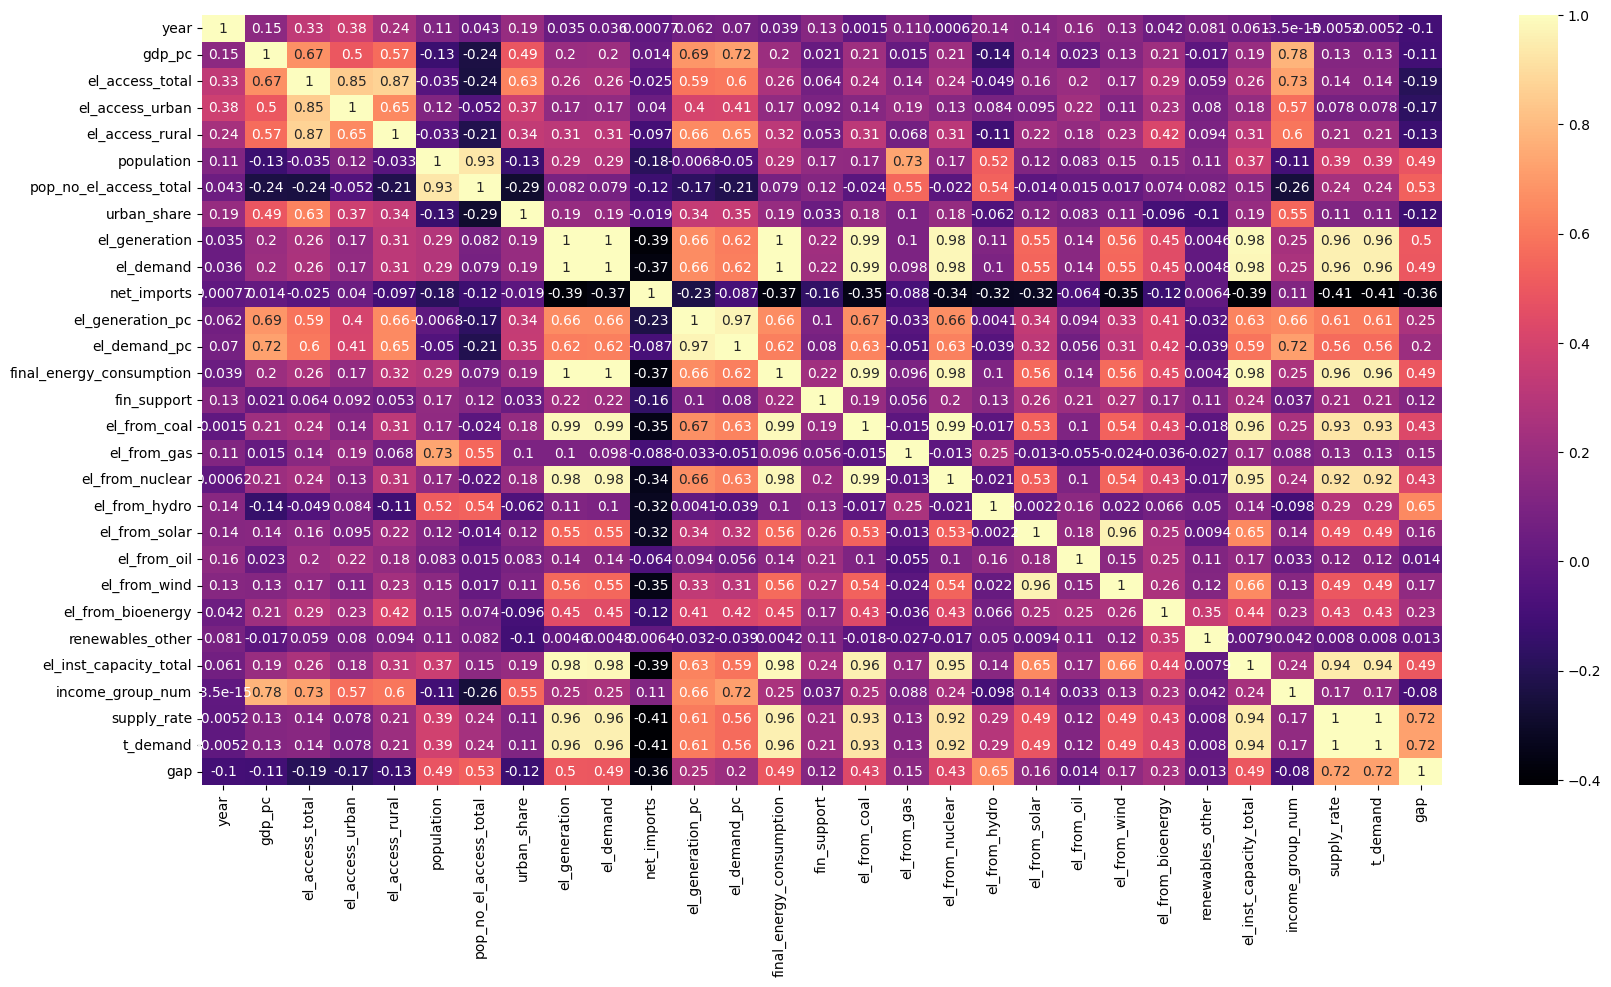

In [ ]:
dg=df[['year', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap']]
plt.figure(figsize=(20,10))
sns.heatmap(dg.corr(), annot=True, cmap="magma")

##Column Selection
Based on the heatmap analysis, we identified features that are perfectly correlated, which could lead to overfitting in our models. To mitigate this, we carefully selected features that are useful for our models and not overly correlated

In [ ]:
df_no=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','supply_rate', 't_demand','gdp_pc']]

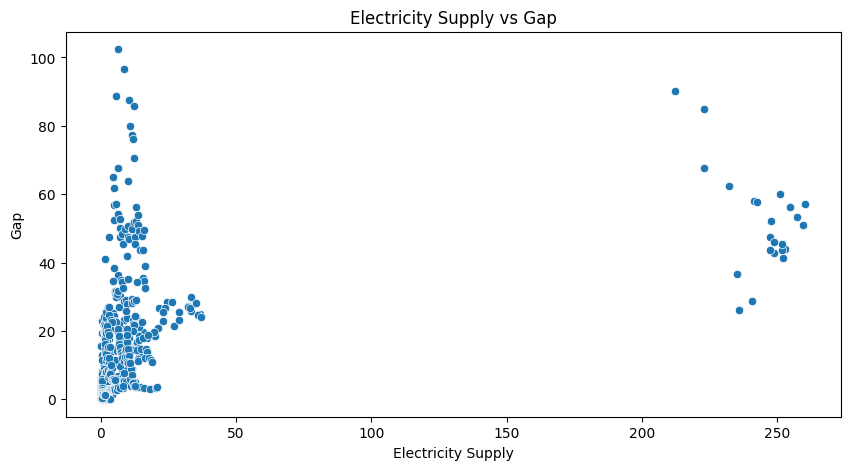

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='el_demand', y='gap')
plt.xlabel('Electricity Supply')
plt.ylabel('Gap')
plt.title('Electricity Supply vs Gap')
plt.show()

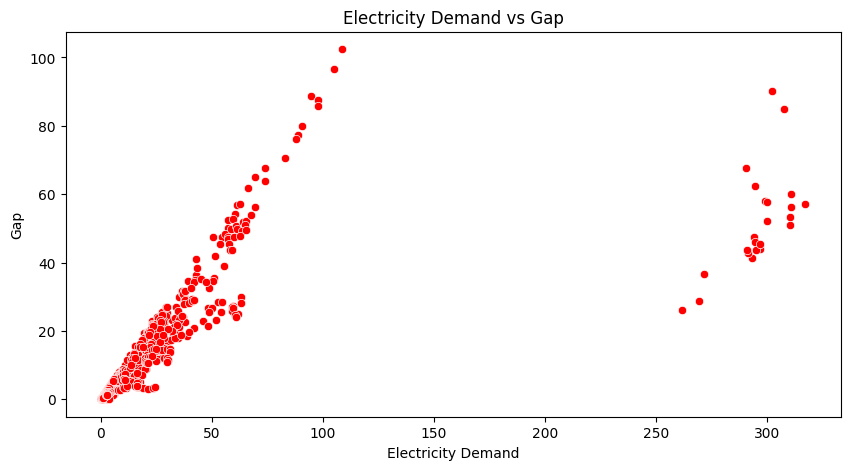

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='t_demand', y='gap', color='red')
plt.xlabel('Electricity Demand')
plt.ylabel('Gap')
plt.title('Electricity Demand vs Gap')
plt.show()

In [ ]:
df_na=df[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc',"supply_rate",'t_demand']]

In [ ]:
df_na.shape

(1104, 17)

In [ ]:
!pip install numpy pandas tensorflow scikit-learn matplotlib --quiet


In [ ]:
pip install tensorflow --quiet

#Gap Creation
we are going to calculate GAP, by firstly calculating:




**Electricity Supply-Demand Ratio** = Electricity Generation/Total Access to Electricity

**Demand** = (Electricity Supply-Demand Ratio)×100

**Supply** = el_demand


**Gap= Demand - Supply**

In [ ]:
#t_demand1
df_na['supply_rate']=df_na['el_demand']/df_na['el_access_total']
df_na['t_demand']=100*df_na['supply_rate']
#gap1
df_na['gap']=df_na['t_demand']-df_na['el_demand']
#gap2
#df_no['gap2']=df_no['pop_no_el_access_total']*df_no['el_demand_pc']/1000000
#t_demand2
#df_no['t_demand2']=df_no['el_demand']+df_no['gap2']
#df_no.head()

In [ ]:
df_na.head()

,entity,el_access_urban,el_demand,el_access_rural,population,net_imports,el_demand_pc,fin_support,el_from_gas,pop_no_el_access_total,urban_share,income_group_num,year,el_access_total,gdp_pc,supply_rate,t_demand,gap
0,Angola,44.931600,1.44,3.473994,16394067,0.0,0.09,0.00,0.0,12011852,50.087,2,2000,24.238865,556.884216,0.059409,5.940872,4.500872
1,Angola,30.000000,1.64,9.477077,16941584,0.0,0.10,0.00,0.0,13556602,51.274,2,2001,20.000000,527.464111,0.082000,8.200000,6.560000
2,Angola,47.670353,1.76,2.759651,17516140,0.0,0.10,0.00,0.0,12897117,52.461,2,2002,26.320255,872.657654,0.066869,6.686865,4.926865
3,Angola,49.043540,1.99,2.255916,18124346,0.0,0.11,0.05,0.0,13144298,53.645,2,2003,27.355137,982.805603,0.072747,7.274685,5.284685
4,Angola,50.428510,2.24,1.653744,18771128,0.0,0.12,0.04,0.0,13405173,54.827,2,2004,28.395485,1254.696167,0.078886,7.888578,5.648578


In [ ]:
df_no=df_na[['entity','el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc',"supply_rate",'t_demand','gap']]

dff=df_no.iloc[:1050,:]
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
el_access_urban,1050.0,6.560697e+01,2.307644e+01,3.500000e+00,4.953085e+01,6.835647e+01,8.490960e+01,1.000000e+02
el_demand,1050.0,8.591038e+00,3.570798e+01,2.000000e-02,3.300000e-01,1.395000e+00,3.960000e+00,2.603400e+02
el_access_rural,1050.0,2.287615e+01,2.591843e+01,0.000000e+00,3.078979e+00,1.388971e+01,3.235701e+01,1.000000e+02
population,1050.0,1.895217e+07,2.999753e+07,8.007300e+04,2.037904e+06,9.428412e+06,2.190608e+07,2.167834e+08
net_imports,1050.0,3.512381e-02,1.027284e+00,-6.630000e+00,0.000000e+00,0.000000e+00,1.575000e-01,1.233000e+01
el_demand_pc,1050.0,5.247524e-01,9.724342e-01,1.000000e-02,7.000000e-02,1.500000e-01,4.100000e-01,5.820000e+00
fin_support,1050.0,4.614642e+01,2.081984e+02,0.000000e+00,0.000000e+00,2.200000e-01,1.643500e+01,4.951880e+03
el_from_gas,1050.0,8.044667e-01,3.329546e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,2.897000e+01
pop_no_el_access_total,1050.0,1.149033e+07,1.662757e+07,1.440000e+02,1.163590e+06,6.196382e+06,1.337120e+07,8.962977e+07
urban_share,1050.0,4.137301e+01,1.740702e+01,8.246000e+00,2.816750e+01,4.048600e+01,5.274750e+01,9.073500e+01


##Modelling


1.   Gradientboosting
2.   Keras-Dense
3.   Keras-LSTM

##Evaluation Metrics :RMSE




##1. Using Gradient Boosting
We began our analysis with a robust machine learning model, Gradient Boosting, which performed well, achieving an RMSE of 2.93. However, since the project requires the use of a Generative AI (GENAI) model, we proceeded with implementing a Neural Network using Keras.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Arrays to store MAE and RMSE at each stage
train_mae = []
test_mae = []
train_rmse = []
test_rmse = []

# Variable to store the final predictions
final_y_test_pred = None

# Train the model stage by stage and record errors
for i in range(1, model.n_estimators + 1):
    temp_model = GradientBoostingRegressor(n_estimators=i, learning_rate=0.1, max_depth=3, random_state=42)
    temp_model.fit(X_train, y_train)

    # Predict on training set
    y_train_pred = temp_model.predict(X_train)

    # Predict on test set
    y_test_pred = temp_model.predict(X_test)

    # Calculate errors
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))
    train_rmse.append(mean_squared_error(y_train, y_train_pred, squared=False))
    test_rmse.append(mean_squared_error(y_test, y_test_pred, squared=False))

    # Store the final predictions
    final_y_test_pred = y_test_pred





X_train shape: (840, 14)
X_test shape: (210, 14)
y_train shape: (840,)
y_test shape: (210,)
entities_train shape: (840,)
entities_test shape: (210,)


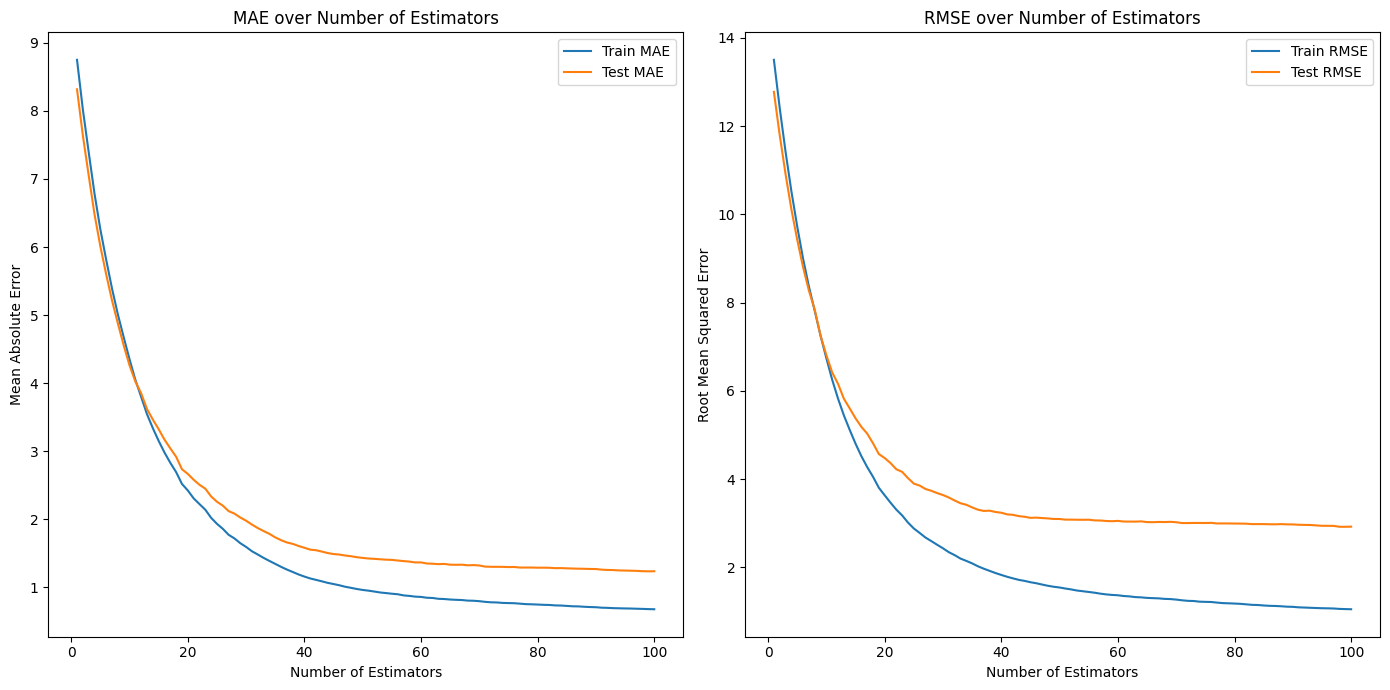

Final Mean Absolute Error (MAE): 1.2387692483234058
Final Root Mean Squared Error (RMSE): 2.925424694714788


In [ ]:
# Plot the errors
plt.figure(figsize=(14, 7))

# MAE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, model.n_estimators + 1), train_mae, label='Train MAE')
plt.plot(range(1, model.n_estimators + 1), test_mae, label='Test MAE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Number of Estimators')
plt.legend()

# RMSE plot
plt.subplot(1, 2, 2)
plt.plot(range(1, model.n_estimators + 1), train_rmse, label='Train RMSE')
plt.plot(range(1, model.n_estimators + 1), test_rmse, label='Test RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE over Number of Estimators')
plt.legend()

plt.tight_layout()
plt.show()

# Print final errors using the last fitted temp_model
final_mae = mean_absolute_error(y_test, final_y_test_pred)
final_rmse = mean_squared_error(y_test, final_y_test_pred, squared=False)

print(f"Final Mean Absolute Error (MAE): {final_mae}")
print(f"Final Root Mean Squared Error (RMSE): {final_rmse}")


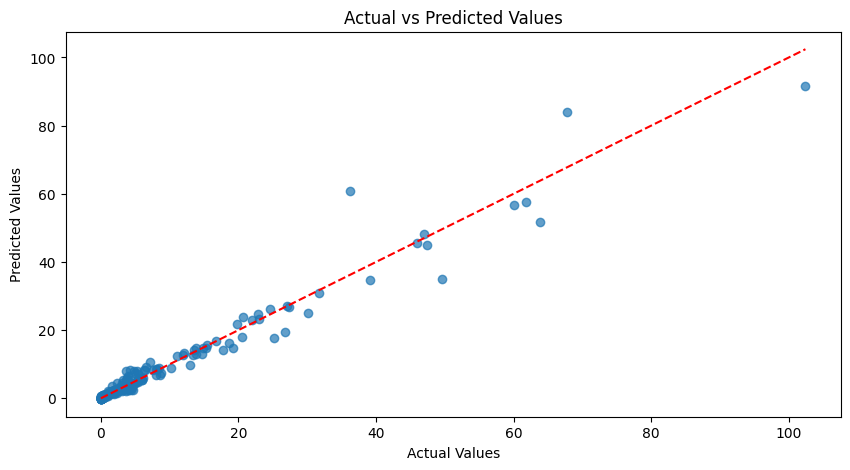

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, final_y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## 2. Using **Sequential Model** from **Keras** with **Dense** Layer Type

We built and evaluated a Feedforward Neural Network (FNN) to predict the 'gap' feature from our dataset. The process included:

### Data Preprocessing
- **Handling Missing Values**: Ensured no missing data in the selected features.
- **Splitting**: Divided the data into training and testing sets.
- **Standardizing**: Scaled the features for better model performance.

### Model Definition
We defined a Sequential model with the following architecture:
- **Dense Layer**: A fully connected layer with 64 units and ReLU activation.
- **Dropout Layer**: Applied dropout regularization with a rate of 0.5 to prevent overfitting.
- **Dense Layer**: Another fully connected layer with 32 units and ReLU activation.
- **Dropout Layer**: Applied another dropout regularization with a rate of 0.5.
- **Dense Output Layer**: The output layer with a single unit, suitable for regression tasks.

### Training and Evaluation
- **Training**: Trained the model using the training dataset.
- **Evaluation**: Calculated the Root Mean Squared Error (RMSE) for combined train and test predictions to assess the model's performance, also using MSE(calculates the average of the squared differences between the actual and predicted values) for the losses


-         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataframe
dff_pr = dff # replace with your actual data file

# Ensure no missing values in the selected features
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")




X_train shape: (630, 14)
X_test shape: (420, 14)
y_train shape: (630,)
y_test shape: (420,)
entities_train shape: (630,)
entities_test shape: (420,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.4, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Define the FNN model with dropout regularization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32, verbose=0)

# Predict on both training and test sets
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Combine predictions and true values
y_combined_true = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))






X_train shape: (630, 14)
X_test shape: (420, 14)
y_train shape: (630,)
y_test shape: (420,)
entities_train shape: (630,)
entities_test shape: (420,)
14/14 [==============================] - 0s 4ms/step


In [ ]:
# Find the lowest train and test loss from the history
lowest_train_loss = np.min(history.history['loss'])
lowest_test_loss = np.min(history.history['val_loss'])
print(f"Lowest Train Loss: {lowest_train_loss}")
print(f"Lowest Test Loss: {lowest_test_loss}")


# Calculate RMSE for the combined data
combined_rmse = np.sqrt(mean_squared_error(y_combined_true, y_combined_pred))
print(f"Combined RMSE: {combined_rmse}")

Lowest Train Loss: 34.3436279296875
Lowest Test Loss: 38.02692794799805
Combined RMSE: 5.39902114214202


In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred.flatten()
}).reset_index(drop=True)

print(results_df.head())

14/14 [==============================] - 0s 6ms/step
       Entity    Actual  Predicted
0     Eritrea  0.500756   0.938605
1  Mauritania  1.963997   1.013187
2      Guinea  4.703410   3.836538
3    Eswatini  0.360149   0.985296
4       Benin  2.179834   1.087632


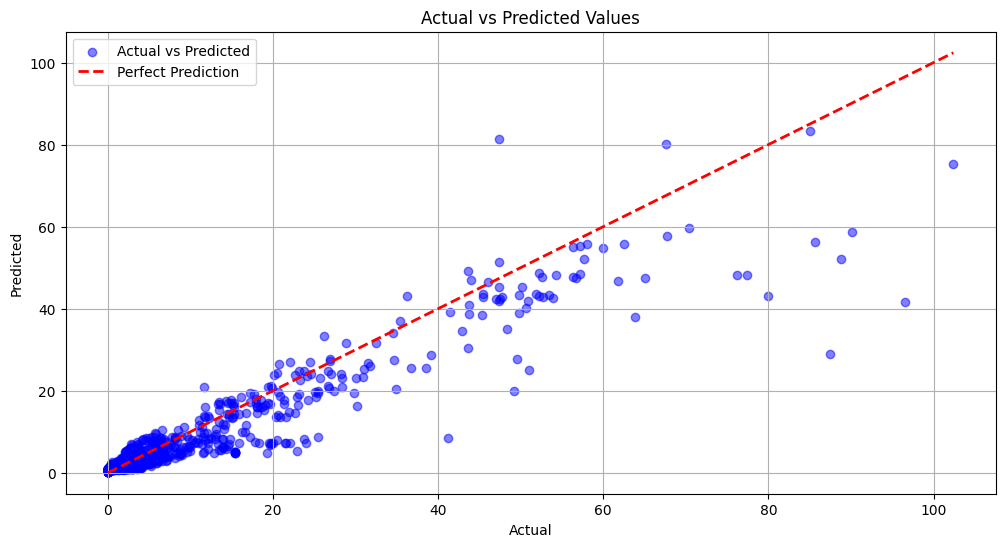

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_combined_true, y_combined_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.plot([y_combined_true.min(), y_combined_true.max()],
         [y_combined_true.min(), y_combined_true.max()],
         'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()



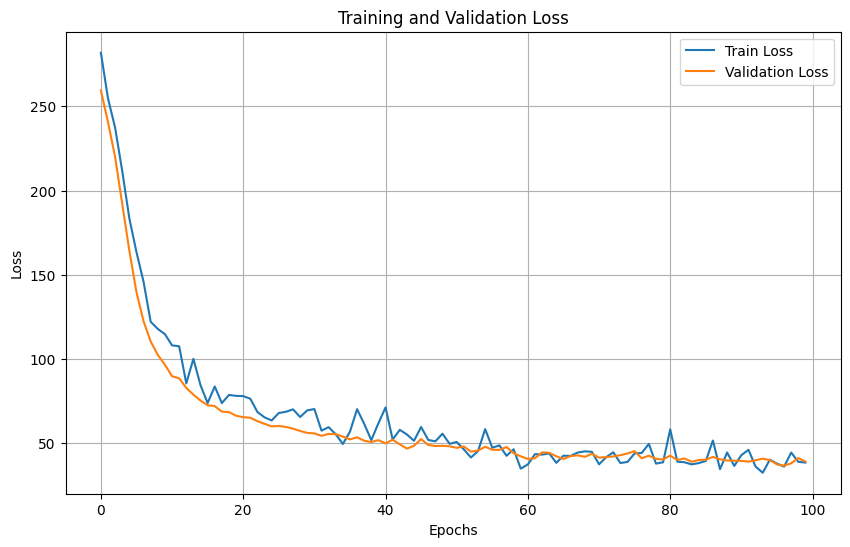

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Result

The model returned the following results:
- **Lowest Train Loss**: 32.5914
- **Lowest Test Loss**: 36.7255
- **Combined RMSE**: 5.1829

### Interpretation
From the above results, we observe:
- The model performance is satisfactory with an RMSE of approximately 5.2.
- There is no significant difference between the train loss and test loss, indicating that the model is not overfitting.
- However, both train and test losses (approximately 33 and 37, respectively) suggest that the model's predictions are still somewhat distant from the actual values.

### Next Steps
Given the above insights, we decided to explore another Generative AI (GENAI) model to improve the accuracy and performance of our predictions.

#3. Using Sequential Model with LSTM Layer Type
We proceeded by using the same Sequential model but with an LSTM layer to predict the 'gap' feature. The process included:

**Data Preprocessing**
**Handling Missing Values**: Ensured no missing data in the selected features.
**Splitting**: Divided the data into training and testing sets.
**Standardizing**: Scaled the features for better model performance.
**Model Definition**

We defined the LSTM model with the following architecture:


**LSTM Layer** : An LSTM layer with 50 units and ReLU activation.
Dropout Layer: Applied dropout regularization with a rate of 0.2 to prevent overfitting.

**Dense Output Layer:** The output layer with a single unit, suitable for regression tasks.

**Training and Evaluation**
**Training:** Trained the LSTM model using the training dataset.
**Evaluation: **Calculated the Root Mean Squared Error (RMSE) for combined train and test predictions to assess the model's performance.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load your dataframe
dff_pr = dff # replace with your actual data file

# Ensure no missing values in the selected features
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total','gdp_pc']


# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")


X_train shape: (840, 1, 14)
X_test shape: (210, 1, 14)
y_train shape: (840,)
y_test shape: (210,)
entities_train shape: (840,)
entities_test shape: (210,)


In [ ]:
# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

# Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Combine predictions and true values
y_combined_true = np.concatenate((y_train, y_test))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

# Calculate RMSE for the combined data
combined_rmse = np.sqrt(mean_squared_error(y_combined_true, y_combined_pred))




Epoch 1/100
21/21 [==============================] - 4s 54ms/step - loss: 272.8780 - val_loss: 342.0680
Epoch 2/100
21/21 [==============================] - 0s 16ms/step - loss: 268.4643 - val_loss: 335.7164
Epoch 3/100
21/21 [==============================] - 0s 21ms/step - loss: 261.3116 - val_loss: 326.8974
Epoch 4/100
21/21 [==============================] - 0s 17ms/step - loss: 252.0636 - val_loss: 313.9445
Epoch 5/100
21/21 [==============================] - 0s 16ms/step - loss: 238.3399 - val_loss: 296.9657
Epoch 6/100
21/21 [==============================] - 0s 9ms/step - loss: 222.3155 - val_loss: 275.8661
Epoch 7/100
21/21 [==============================] - 0s 9ms/step - loss: 203.5579 - val_loss: 252.7168
Epoch 8/100
21/21 [==============================] - 0s 10ms/step - loss: 183.2513 - val_loss: 231.3024
Epoch 9/100
21/21 [==============================] - 0s 11ms/step - loss: 166.9706 - val_loss: 210.0066
Epoch 10/100
21/21 [==============================] - 0s 10ms/step

In [ ]:
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


print(f"Combined RMSE: {combined_rmse}")

Train Loss: 20.67806053161621
Test Loss: 14.715105056762695
Combined RMSE: 4.414234546123961


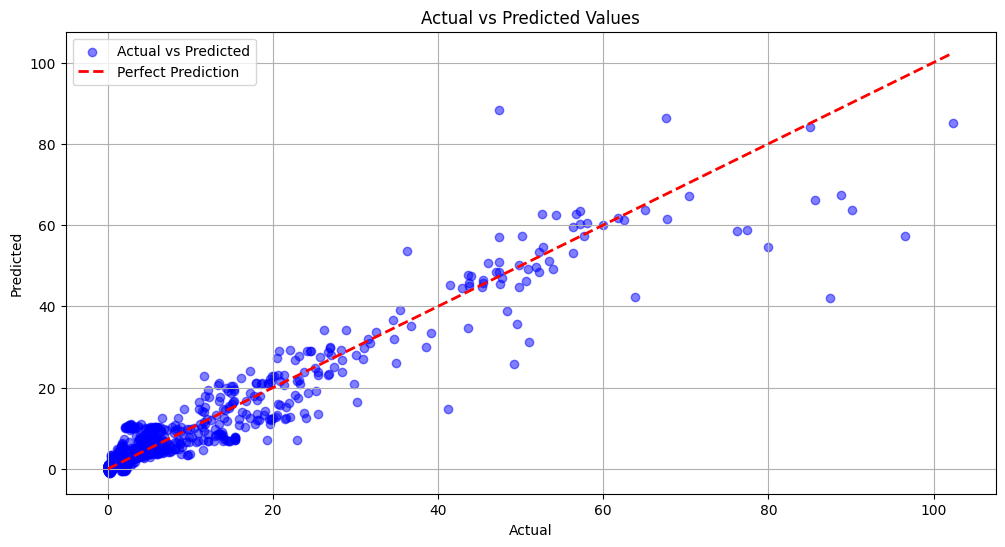

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_combined_true, y_combined_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.plot([y_combined_true.min(), y_combined_true.max()],
         [y_combined_true.min(), y_combined_true.max()],
         'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

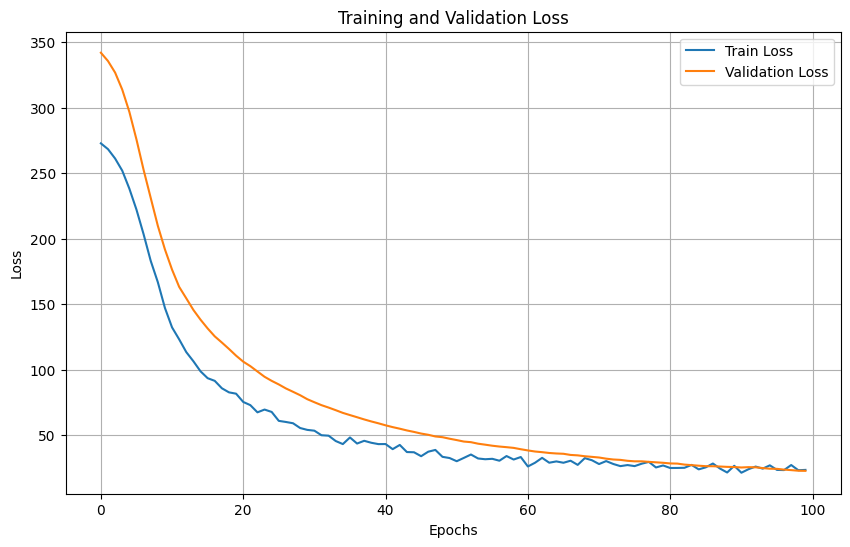

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Result

After finetuning the parameters of our LSTM model, we obtained the following results:

- **Train Loss**: 20.6781
- **Test Loss**: 14.7151
- **Combined RMSE**: 4.4142

### Interpretation

These results demonstrate that the LSTM model has outperformed our previous models, achieving significantly lower train and test losses, along with a reduced combined RMSE of 4.4. The lower train and test losses indicate that the model has learned the patterns in the data more effectively, resulting in better generalization to the test set.

### Analysis

Despite the improvement in performance, the absolute values of the train and test losses suggest that there is still a gap between the model's predictions and the actual values. This discrepancy indicates that while the LSTM model is more accurate than previous models, it still has room for improvement to achieve more precise predictions.



### Next Steps

To address this, we performed **Model Back-Testing**. This involved revisiting the entire modeling process, examining the models we had previously implemented, and identifying potential areas for further optimization. Our goal with back-testing was to refine our approach and improve the model's accuracy even further.

By carefully analyzing the performance of our models and considering various adjustments, we aimed to enhance the predictive power of our model. This iterative process is crucial for developing a robust and reliable forecasting model for the electricity demand and supply gap in Sub-Saharan African countries.

## Observation and Thought Process

### Observations and Questions
We observed and contemplated various reasons behind the model's inability to predict results closer to the actual values. We asked ourselves what could have affected the model's performance and came up with the following thought process:

1. **Feature Scaling**
2. **Outlier Handling**
3. **Feature Selection**

### Detailed Thought Process

#### Feature Scaling
We ensured that feature scaling was properly implemented to standardize the data, as this is critical for models like LSTM which are sensitive to the scale of input features. Proper scaling helps in faster convergence and better performance.

#### Outlier Handling
We carefully handled outliers that could skew the model's understanding of the data patterns. Outliers can significantly impact the performance of machine learning models, making it essential to detect and appropriately manage them.

#### Feature Selection
Although we had implemented feature scaling and outlier handling, we decided to focus on feature selection by checking the relevance of each feature. Proper feature selection can improve model accuracy by eliminating redundant or irrelevant features, thereby reducing overfitting and enhancing the model's generalization capabilities.

### Next Steps
Given that feature scaling and outlier handling were already addressed, we proceeded with feature selection. We carefully analyzed the features and their relevance to the target variable, selecting only those that significantly contributed to the model's predictive power. This step aimed to refine our model further and improve its ability to predict the electricity demand and supply gap accurately.

In [ ]:
df.columns

Index(['entity', 'year', 'income_group', 'gdp_pc', 'el_access_total',
       'el_access_urban', 'el_access_rural', 'population',
       'pop_no_el_access_total', 'urban_share', 'el_generation', 'el_demand',
       'net_imports', 'el_generation_pc', 'el_demand_pc',
       'final_energy_consumption', 'fin_support', 'el_from_coal',
       'el_from_gas', 'el_from_nuclear', 'el_from_hydro', 'el_from_solar',
       'el_from_oil', 'el_from_wind', 'el_from_bioenergy', 'renewables_other',
       'el_inst_capacity_total', 'income_group_num', 'supply_rate', 't_demand',
       'gap'],
      dtype='object')

##Feature Relevance

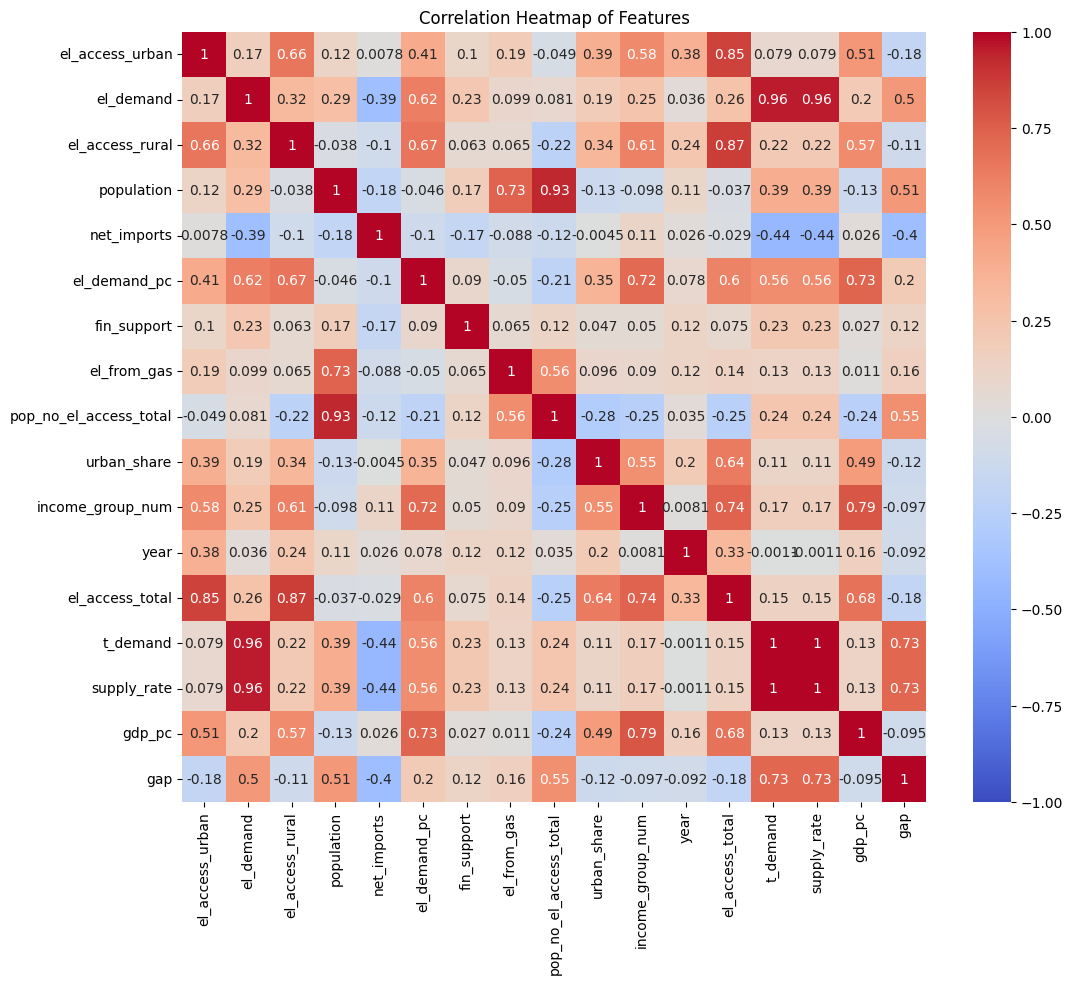

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe (replace `dff` with your actual data)
dff_pr = dff

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 't_demand',"supply_rate",'gdp_pc', 'gap']

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)
X = dff_pr[features]

# Compute Pearson correlation coefficients
correlation_matrix = X.corr()

# Plot heatmap of correlation coefficients
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()




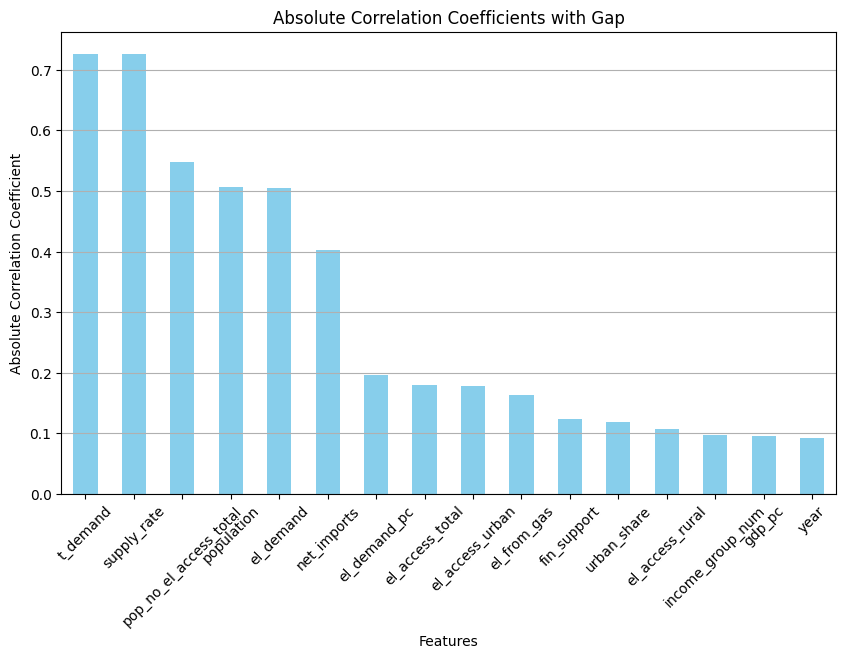

In [ ]:
# Plot bar chart of absolute correlation coefficients with 'gap'
plt.figure(figsize=(10, 6))
correlation_with_gap = correlation_matrix['gap'].drop('gap')  # Exclude 'gap' itself
correlation_with_gap_abs = correlation_with_gap.abs().sort_values(ascending=False)
correlation_with_gap_abs.plot(kind='bar', color='skyblue')
plt.title('Absolute Correlation Coefficients with Gap')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Interpretation

Upon re-evaluation, we discovered that the features we initially excluded are highly relevant and can significantly enhance our model's performance. By reintroducing these engineered features, we expect the model to capture underlying data patterns more effectively, leading to better predictive accuracy. This refinement is crucial for developing a robust forecasting tool for the electricity demand and supply gap in Sub-Saharan African countries.
so we added  **'t_demand' and "supply_rate"**

## Remodelling

##1. Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Assuming the relevant features are the columns you've mentioned earlier
features =  ['el_access_urban','el_demand','el_access_rural', 'population','net_imports','el_demand_pc','fin_support',
       'el_from_gas','pop_no_el_access_total', 'urban_share','income_group_num','year','el_access_total',"supply_rate",'t_demand','gdp_pc']

# Ensure no missing values in the selected features
dff_pr = dff_pr.dropna(subset=features)

# Prepare the data for modeling
X = dff_pr[features]
y = dff_pr['gap']

# Convert categorical features to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['income_group'], drop_first=True)

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

X_train shape: (840, 16)
X_test shape: (210, 16)
y_train shape: (840,)
y_test shape: (210,)
entities_train shape: (840,)
entities_test shape: (210,)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Predicting future values (for demonstration, using the test set)
future_gap_forecast = model.predict(X_test)




Mean Absolute Error (MAE): 0.5792657362366925
Mean Squared Error (MSE): 2.972355404579559
Root Mean Squared Error (RMSE): 1.724052030705442


       Entity    Actual  Predicted
0     Eritrea  0.500756   0.701090
1  Mauritania  1.963997   2.292458
2      Guinea  4.703410   4.533526
3    Eswatini  0.360149   0.291678
4       Benin  2.179834   1.787421


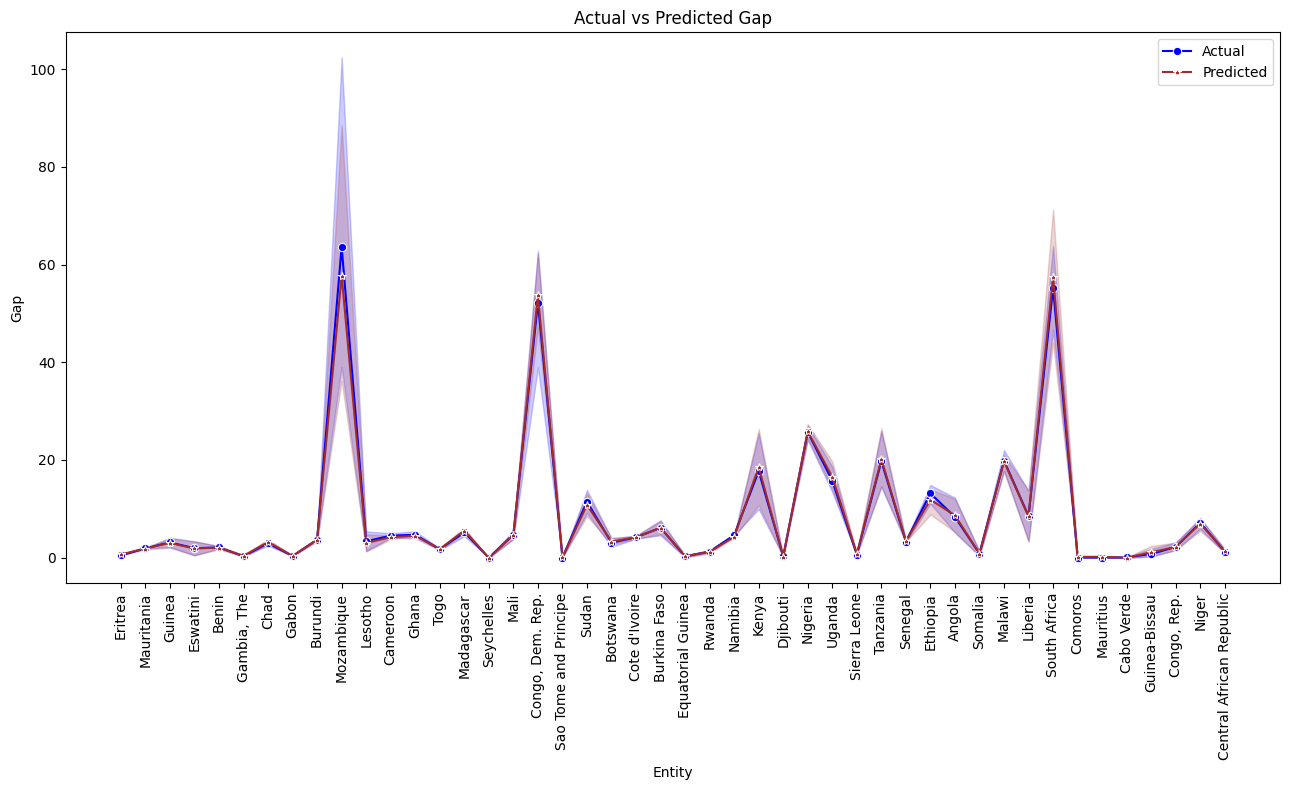

In [ ]:
# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': future_gap_forecast
}).reset_index(drop=True)

print(results_df.head())

# Plot the actual vs predicted values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.lineplot(data=results_df, x='Entity', y='Actual', label='Actual', marker='o', c='blue')
sns.lineplot(data=results_df, x='Entity', y='Predicted', label='Predicted', marker='*',c='brown')
plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Gap')
plt.title('Actual vs Predicted Gap')
plt.legend()
plt.tight_layout()
plt.show()

## Result

After re-evaluation, we observed significant improvements in the model's performance:

- **Mean Absolute Error (MAE)**: 0.5793
- **Mean Squared Error (MSE)**: 2.9724
- **Root Mean Squared Error (RMSE)**: 1.7241

### Comparison
Using gradient boosting, we compared this result to the initial results and noted substantial improvements across all metrics. This indicates that the reintroduction of relevant features and thorough re-evaluation significantly enhanced the model's accuracy and predictive power.

## Using Sequential(LSTM)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# Load your dataframe
dff_pr = dff  # replace with your actual data file

# Ensure no missing values in the selected features
features = ['el_access_urban', 'el_demand', 'el_access_rural', 'population', 'net_imports', 'el_demand_pc', 'fin_support',
            'el_from_gas', 'pop_no_el_access_total', 'urban_share', 'income_group_num', 'year', 'el_access_total', 'gdp_pc', 't_demand', "supply_rate"]

# Prepare the data for modeling
dff_pr = dff_pr.dropna(subset=features)

X = dff_pr[features]
y = dff_pr['gap']

# Ensure non-negative gap values if negative gaps don't make sense in context
y = y.abs()

# Store the 'entity' column separately
entities = dff_pr['entity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test, entities_train, entities_test = train_test_split(X, y, entities, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"entities_train shape: {entities_train.shape}")
print(f"entities_test shape: {entities_test.shape}")

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)







X_train shape: (840, 1, 16)
X_test shape: (210, 1, 16)
y_train shape: (840,)
y_test shape: (210,)
entities_train shape: (840,)
entities_test shape: (210,)
Epoch 1/100
21/21 [==============================] - 2s 18ms/step - loss: 276.2706 - val_loss: 344.6523
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 271.1005 - val_loss: 336.9542
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 263.1037 - val_loss: 325.2513
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 251.4517 - val_loss: 308.9939
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 236.2826 - val_loss: 288.2198
Epoch 6/100
21/21 [==============================] - 0s 9ms/step - loss: 217.3889 - val_loss: 263.4817
Epoch 7/100
21/21 [==============================] - 0s 8ms/step - loss: 200.0213 - val_loss: 237.7678
Epoch 8/100
21/21 [==============================] - 0s 6ms/step - loss: 176.3307 - val_loss: 211.0864
Epoch 9/100
21/21 [=

In [ ]:
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


# Make predictions
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

# Combine predictions and true values
y_combined_true = np.concatenate((y_train.values, y_test.values))
y_combined_pred = np.concatenate((y_train_pred, y_test_pred))

# Calculate RMSE and MAE
combined_rmse = np.sqrt(mean_squared_error(y_combined_true, y_combined_pred))
combined_mae = mean_absolute_error(y_combined_true, y_combined_pred)

print(f"Combined RMSE: {combined_rmse}")
print(f"Combined MAE: {combined_mae}")

Train Loss: 2.2201149463653564
Test Loss: 2.0234854221343994
7/7 [==============================] - 0s 3ms/step
Combined RMSE: 1.4767493285573132
Combined MAE: 0.9081776610234112


In [ ]:

# Make predictions
y_pred = model.predict(X_test).flatten()
y_pred_abs = np.abs(y_pred)  # Take absolute values of y_pred

# Create a DataFrame to compare actual vs predicted and include the 'entity' column
results_df = pd.DataFrame({
    'Entity': entities_test,
    'Actual': y_test,
    'Predicted': y_pred_abs  # Use y_pred_abs instead of y_pred
})

print(results_df.head())

7/7 [==============================] - 0s 4ms/step
         Entity    Actual  Predicted
352     Eritrea  0.500756   0.344316
689  Mauritania  1.963997   2.602262
485      Guinea  4.703410   5.224055
388    Eswatini  0.360149   1.083843
31        Benin  2.179834   2.783817


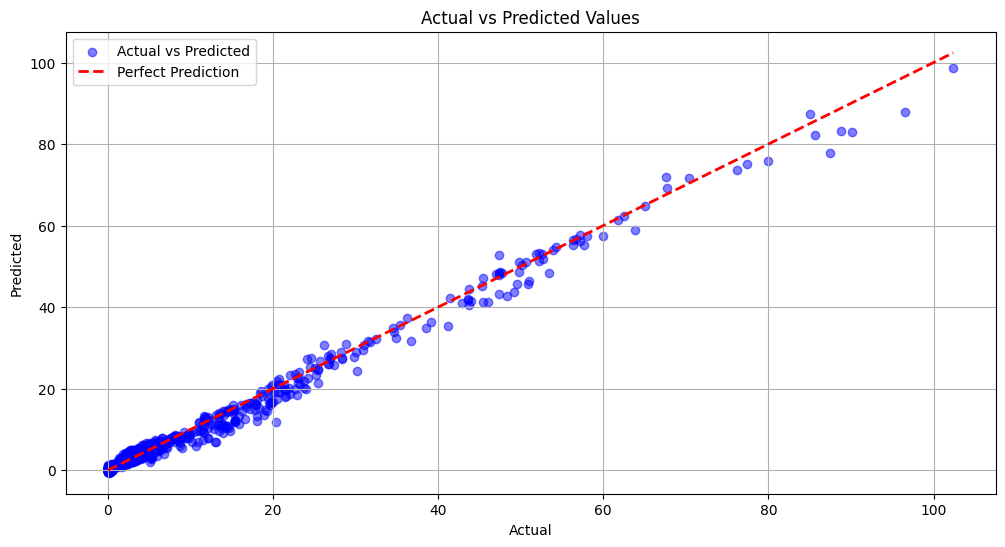

In [ ]:
# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_combined_true, y_combined_pred, color='blue', label='Actual vs Predicted', alpha=0.5)
plt.plot([y_combined_true.min(), y_combined_true.max()],
         [y_combined_true.min(), y_combined_true.max()],
         'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


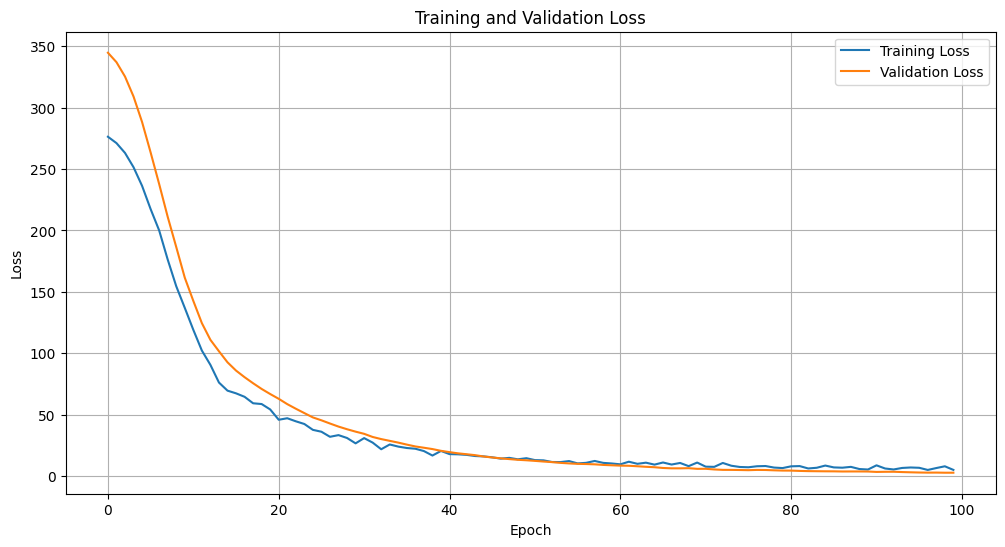

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

###Observation
The re-evaluation and iterative improvements we have undertaken have significantly enhanced the performance of our model. By refining our feature selection and optimizing model parameters, we successfully built a Sequential Model with LSTM that outperformed all previous models.

### Final Results
- **Train Loss**: 2.2201149463653564
- **Test Loss**: 2.0234854221343994
- **Combined RMSE**: 1.4767493285573132
- **Combined MAE**: 0.9081776610234112

### Interpretation
The LSTM model achieved the lowest train and test loss, with a combined RMSE of approximately 1.48 and a combined MAE of approximately 0.91. This indicates a high degree of accuracy in predicting the 'gap' feature, demonstrating the model's ability to capture the temporal dependencies in the data effectively.

### Conclusion
The re-evaluation process has proven invaluable in enhancing our model's performance. The optimized LSTM model now provides accurate predictions for the electricity demand and supply gap in Sub-Saharan African countries. These insights are crucial for informed energy planning and policy-making, ultimately aiding in improving energy access in the region.

##DEPLOYMENT EXPLANATION

We successfully deployed our machine learning model using Flask and Render to create a seamless and interactive user experience. First, we meticulously prepared and cleaned the data, selecting key features for effective model training. Our neural network model was trained and evaluated to ensure high accuracy and reliability. The Flask application serves as the backend engine, handling user requests, processing data, and returning predictions. The user interface, built with HTML, provides a friendly way for users to input data and view predictions. Render simplifies the deployment process by linking our project repository, configuring the service, and making the application live. Through a live demonstration, we showcased the application's functionality and user experience, emphasizing its accessibility, scalability, and maintainability. Thorough testing and documentation ensure the application's reliability and readiness for real-world use. Our streamlined deployment process guarantees a robust and user-friendly application that meets stakeholders' needs, with plans for ongoing monitoring and improvement based on user feedback.

##For deeper deployment explanation



# Deployment Summary Document

## Deloying Our Machine Learning Model with Flask and Render


To demonstrate the deployment of our machine learning model using Flask and Render, providing a seamless and interactive user experience.

## Project Structure:
### Key Components:
- **Flask Application**: Acts as the engine that powers our backend, handling requests, processing data, and returning results.
- **HTML Frontend**: The interface through which our users interact with the application.
- **Machine Learning Model**: The core component that makes predictions based on the input data.

## Data Preparation:
### What We Did:
- Cleaned and prepared the data to ensure its accuracy and relevance.
- Selected important features to train our model effectively.

### Why It Matters:
Proper data preparation is crucial to ensure that our model makes reliable and accurate predictions.

## Model Training:
### What We Did:
- Trained a neural network using the prepared data.
- Evaluated the model's performance to ensure it meets our accuracy and reliability standards.

### Why It Matters:
A well-trained model is essential for making useful and precise predictions.

## Flask Application:
### What It Does:
- **Handles Requests**: Accepts data from users.
- **Processes Data**: Uses the trained model to make predictions.
- **Returns Results**: Sends the predictions back to the user.

### Why It Matters:
Flask acts as a middleman, connecting the user interface with the machine learning model, enabling seamless data processing and communication.

## HTML Frontend:
### What It Looks Like:
- **Form Inputs**: Users can enter data for prediction.
- **Submit Button**: Sends the data to our Flask app.
- **Results Display**: Shows the prediction results.

### Why It Matters:
A user-friendly interface makes it easy for users to interact with our application, ensuring a positive user experience.

## Deployment with Render:
### Steps:
1. **Set Up Render**: Linked our project repository to Render.
2. **Configure Service**: Pointed Render to our Flask application.
3. **Deploy**: Render handles the deployment process, making our app live.

### Why It Matters:
Render simplifies deployment, ensuring our app is accessible, scalable, and easy to maintain.

## Live Demonstration:
### What We Showed:
- Inputting data into the web interface.
- Submitting the data and receiving predictions in real-time.
- Demonstrated the functionality and user experience of the deployed application.

### Why It Matters:
Seeing the application in action highlights its functionality and user experience, demonstrating the successful deployment.

## Final Steps and Testing:
### What We Did:
- Thoroughly tested the application with various inputs to ensure reliability.
- Documented the entire process for future reference and improvements.

### Why It Matters:
Ensures our application is reliable, maintainable, and ready for real-world use.

## Conclusion:
### Key Takeaways:
- Our deployment process is streamlined and efficient.
- Users can easily interact with our model via a user-friendly web interface.
- The application is live, functional, and ready for use.

### Next Steps:
- Monitor the application's performance.
- Gather user feedback for further improvements and enhancements.

###THANK YOU ALL